In [46]:
from roi import equity, external, utilities, macro, metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bls_api_key = "c8803d0ba66c4592b8b0eff68ac9ebb0"

In [3]:
data = pd.read_csv("testing/testing-data/test_microdata.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'race', 'gender', 'earnings_start', 'earnings_end', 'age',
       'program', 'program_start', 'program_end', 'education_level',
       'completer', 'employed_at_end', 'employed_at_start', 'state',
       'full_address', 'Address', 'City', 'State', 'Zip', 'id', 'start_month',
       'end_month'],
      dtype='object')

__Equity analysis__

In [5]:
gini = equity.Gini.from_dataframe(data, 'gender', 'earnings_end', sample = 2000)
gini.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:77: UserWarning: When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.
  warnings.warn("When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.")
/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 104 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensur

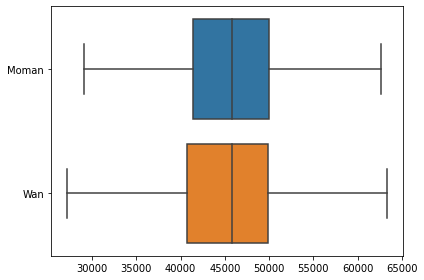

In [6]:
gini.viz

In [7]:
gini.ratio

0.02390954546686027

In [8]:
gini.sample

2000

__Geocode addresses__

In [9]:
small_data = data.sample(30)

In [10]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,employed_at_start,state,full_address,Address,City,State,Zip,id,start_month,end_month
9272,9273,Neptunian,Wan,36897.0,49222.0,18,Art History,2015,2017,125,...,0,8,102 WEST BRYAN STREET BRYAN OH 43506,102 WEST BRYAN STREET,BRYAN,OH,43506,7136,10,5
8062,8063,Earthling,Wan,24053.0,55929.0,47,Electrical Engineering,2013,2014,124,...,0,8,"89 MAIN STREET, SUITE 203 MILFORD MA 1757","89 MAIN STREET, SUITE 203",MILFORD,MA,1757,2772,10,6
9524,9525,Earthling,Moman,44149.0,41589.0,33,Economics,2014,2018,125,...,1,8,1040 BELVIDERE ST EL PASO TX 79912,1040 BELVIDERE ST,EL PASO,TX,79912,2422,8,5
4259,4260,Neptunian,Wan,35508.0,49359.0,36,French Literature,2016,2022,81,...,1,8,855 E GOLF ROAD SUITE 1128 ARLINGTON HEIGHTS I...,855 E GOLF ROAD SUITE 1128,ARLINGTON HEIGHTS,IL,60005,2054,9,6
1926,1927,Neptunian,Wan,32480.0,42918.0,26,French Literature,2017,2022,60,...,0,8,"3245 EAST LIVINGSTON AVENUE, SUITE 200 COLUMBU...","3245 EAST LIVINGSTON AVENUE, SUITE 200",COLUMBUS,OH,43227,10069,9,7


In [11]:
small_data['geocode'] = external.Census.get_batch_geocode(small_data)

Successfully geocoded 90.0% of 30 passed addresses.
Of successfully matched addresses, 66.67% were exact matches


__Get SES for each individual with a geocode__

In [12]:
adi = equity.ADI()

In [13]:
small_data['ses'] = adi.get_quintile_for_geocodes_frame(small_data, 'geocode')

Geocode merge: Merged 27 of 3 observations in input dataframe (90.0%)


In [14]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,geocode,ses
9272,9273,Neptunian,Wan,36897.0,49222.0,18,Art History,2015,2017,125,...,102 WEST BRYAN STREET BRYAN OH 43506,102 WEST BRYAN STREET,BRYAN,OH,43506,7136,10,5,391719507002,60-80
8062,8063,Earthling,Wan,24053.0,55929.0,47,Electrical Engineering,2013,2014,124,...,"89 MAIN STREET, SUITE 203 MILFORD MA 1757","89 MAIN STREET, SUITE 203",MILFORD,MA,1757,2772,10,6,,NaN
9524,9525,Earthling,Moman,44149.0,41589.0,33,Economics,2014,2018,125,...,1040 BELVIDERE ST EL PASO TX 79912,1040 BELVIDERE ST,EL PASO,TX,79912,2422,8,5,481410011091,20-40
4259,4260,Neptunian,Wan,35508.0,49359.0,36,French Literature,2016,2022,81,...,855 E GOLF ROAD SUITE 1128 ARLINGTON HEIGHTS I...,855 E GOLF ROAD SUITE 1128,ARLINGTON HEIGHTS,IL,60005,2054,9,6,170318051072,60-80
1926,1927,Neptunian,Wan,32480.0,42918.0,26,French Literature,2017,2022,60,...,"3245 EAST LIVINGSTON AVENUE, SUITE 200 COLUMBU...","3245 EAST LIVINGSTON AVENUE, SUITE 200",COLUMBUS,OH,43227,10069,9,7,390490093332,80-100


__Check out SES equity concerns__

In [15]:
theil_t = equity.Theil_T.from_dataframe(small_data, 'ses', 'earnings_end')

In [16]:
theil_t.calculate()

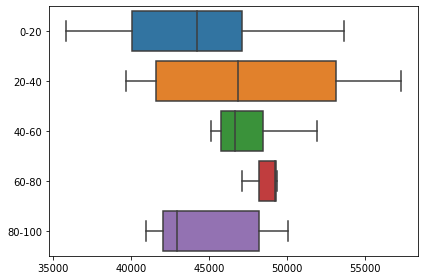

In [17]:
theil_t.viz

In [18]:
theil_t.ratio

0.12903204579866015

__Calculate graduate wage summary statistics__

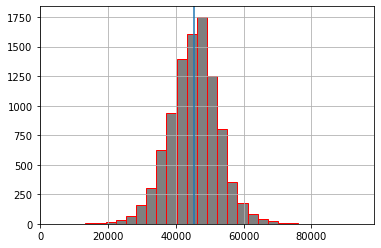

In [19]:
fig, ax = plt.subplots()
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0.5), bins=30)
plt.axvline(x=np.mean(data['earnings_end']))

In [20]:
utilities.multiple_describe(data, 'program', 'earnings_end')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.0,44639.437236,44741.5,6753.785267,6862.0,67561.0
1,Art History,1444.0,45643.766545,46205.0,6569.827363,17333.0,94136.0
2,Biology,1358.0,44965.920746,45574.0,7305.916491,19947.0,73508.0
3,Economics,1451.0,46064.692141,46641.0,7555.189637,13759.0,75326.0
4,Electrical Engineering,1495.0,45717.225989,45878.0,7653.728136,10667.0,70035.0
5,French Literature,1387.0,44657.446119,44871.0,7048.111317,4272.0,80934.0
6,Philosophy,1549.0,45563.126114,45553.0,8306.678966,9972.0,85146.0


__Adjust wages for inflation__

In [21]:
bls = macro.BLS_Ops()
data['earnings_end_adjusted'] = bls.adjust_to_current_dollars(data, 'program_end', 'earnings_end')

Latest CPI year in provided BLS data is 2018.0: All dollars being adjusted to 2018.0 dollars.
Years in provided dataframe for which there is no data in the provided CPI frame:

{2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026}


/Users/mattlerner/roi/sbir-roi/roi/macro.py:57: UserWarning: Value column earnings_end contains 509 NA values (5.0%) of total.
  warnings.warn("Value column {} contains {} NA values ({}%) of total.".format(value_column_name, value_nas, round(100*value_nas/len(frame_),2)))
/Users/mattlerner/roi/sbir-roi/roi/macro.py:70: UserWarning: 2047 rows in column program_end could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.
  warnings.warn("{} rows in column {} could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.".format(unmerged_len, year_column_name))

In [22]:
data[['program_end','earnings_end','earnings_end_adjusted']].sample(10)

,program_end,earnings_end,earnings_end_adjusted
8338,2014,51881.0,55034.081482
8429,2012,49401.0,54030.544468
8031,2015,48247.0,51117.302087
2110,2017,45033.0,46131.644043
8647,2017,43164.0,44217.047132
8884,2022,36640.0,NaN
2215,2017,47993.0,49163.857451
6536,2019,33741.0,NaN
3842,2017,50323.0,51550.701112
10061,2014,46305.0,49119.198609


__Recalculate average graduate wage by program__

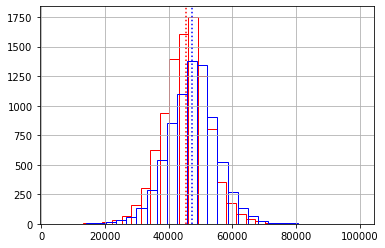

In [23]:
fig, ax = plt.subplots()

# unadjusted
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end']), color="red", linestyle=":")

# adjusted
data['earnings_end_adjusted'].hist(ax=ax, edgecolor="blue", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end_adjusted']), color="blue", linestyle=":")

__Calculate earnings premium - Simple way__

In [24]:
data['earnings_change'] = data['earnings_end'] - data['earnings_start']

In [25]:
utilities.multiple_describe(data, 'program', 'earnings_change')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.0,9620.090841,9776.0,7012.515293,-24859.0,40803.0
1,Art History,1444.0,10332.517451,9971.0,7061.107207,-24181.0,78852.0
2,Biology,1358.0,9937.524590,9719.0,7014.122898,-23028.0,43846.0
3,Economics,1451.0,10610.720877,10666.5,7182.989146,-32282.0,56690.0
4,Electrical Engineering,1495.0,10172.111028,10131.5,7097.846180,-28112.0,50351.0
5,French Literature,1387.0,9900.157600,9994.5,7217.218102,-30161.0,49783.0
6,Philosophy,1549.0,10381.342010,10150.0,8099.392511,-30166.0,52950.0


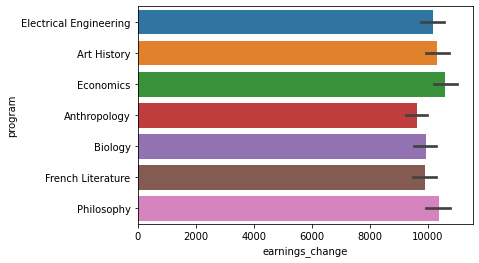

In [26]:
sns.barplot(x="earnings_change", y="program", data=data, estimator=np.mean)

__Calculate earnings premium - Fancy way__

In [27]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change
0,1,Martian,Wan,26340.0,37403.0,18,Electrical Engineering,2014,2016,0,...,"2 SOUTH GOLD DRIVE, SUITE B HAMILTON NJ 8691","2 SOUTH GOLD DRIVE, SUITE B",HAMILTON,NJ,8691,9630,10,5,39134.876036,11063.0
1,2,Martian,Wan,27562.0,37011.0,43,Electrical Engineering,2015,2017,0,...,"225 WATER STREET, SUITE C-101 PLYMOUTH MA 2360","225 WATER STREET, SUITE C-101",PLYMOUTH,MA,2360,4927,9,6,37913.935951,9449.0
2,3,Martian,Wan,26641.0,36806.0,57,Electrical Engineering,2013,2013,0,...,"963 EAST STUART DRIVE, SUITE 1 GALAX VA 24333","963 EAST STUART DRIVE, SUITE 1",GALAX,VA,24333,3063,9,5,39673.618000,10165.0
3,4,Martian,Wan,25812.0,37242.0,33,Electrical Engineering,2010,2011,0,...,5922 18TH AVENUE BROOKLYN NY 11204,5922 18TH AVENUE,BROOKLYN,NY,11204,9203,9,6,41576.534901,11430.0
4,5,Martian,Wan,25581.0,37408.0,47,Electrical Engineering,2011,2012,0,...,1675 RANGE ST BOULDER CO 80301,1675 RANGE ST,BOULDER,CO,80301,1136,10,5,40913.637527,11827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.0,32819.0,20,Philosophy,2015,2019,125,...,315 1ST STREET SOUTH REFORM AL 35481,315 1ST STREET SOUTH,REFORM,AL,35481,4515,9,5,NaN,5979.0
10174,10175,Neptunian,Moman,16577.0,69527.0,47,Philosophy,2015,2019,125,...,4310 AUSTIN STREET HOUSTON TX 77004,4310 AUSTIN STREET,HOUSTON,TX,77004,1306,9,6,NaN,52950.0
10175,10176,Neptunian,Moman,NaN,28739.0,60,Philosophy,2018,2020,125,...,101 EAST CORPORATE DRIVE SUITE #210 LEWISVILLE...,101 EAST CORPORATE DRIVE SUITE #210,LEWISVILLE,TX,75067,6718,8,7,NaN,NaN
10176,10177,Neptunian,Moman,NaN,39994.0,55,Philosophy,2016,2018,125,...,812 NEWTOWN ROAD VIRGINIA BEACH VA 23462,812 NEWTOWN ROAD,VIRGINIA BEACH,VA,23462,5574,9,6,39994.000000,NaN


In [28]:
data['year_month_entry'] = data['program_start'].astype(str) + '-' + data['start_month'].astype(str).str.zfill(2)
data['year_month_exit'] = data['program_end'].astype(str) + '-' + data['end_month'].astype(str).str.zfill(2)

In [29]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,City,State,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit
0,1,Martian,Wan,26340.0,37403.0,18,Electrical Engineering,2014,2016,0,...,HAMILTON,NJ,8691,9630,10,5,39134.876036,11063.0,2014-10,2016-05
1,2,Martian,Wan,27562.0,37011.0,43,Electrical Engineering,2015,2017,0,...,PLYMOUTH,MA,2360,4927,9,6,37913.935951,9449.0,2015-09,2017-06
2,3,Martian,Wan,26641.0,36806.0,57,Electrical Engineering,2013,2013,0,...,GALAX,VA,24333,3063,9,5,39673.618000,10165.0,2013-09,2013-05
3,4,Martian,Wan,25812.0,37242.0,33,Electrical Engineering,2010,2011,0,...,BROOKLYN,NY,11204,9203,9,6,41576.534901,11430.0,2010-09,2011-06
4,5,Martian,Wan,25581.0,37408.0,47,Electrical Engineering,2011,2012,0,...,BOULDER,CO,80301,1136,10,5,40913.637527,11827.0,2011-10,2012-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.0,32819.0,20,Philosophy,2015,2019,125,...,REFORM,AL,35481,4515,9,5,NaN,5979.0,2015-09,2019-05
10174,10175,Neptunian,Moman,16577.0,69527.0,47,Philosophy,2015,2019,125,...,HOUSTON,TX,77004,1306,9,6,NaN,52950.0,2015-09,2019-06
10175,10176,Neptunian,Moman,NaN,28739.0,60,Philosophy,2018,2020,125,...,LEWISVILLE,TX,75067,6718,8,7,NaN,NaN,2018-08,2020-07
10176,10177,Neptunian,Moman,NaN,39994.0,55,Philosophy,2016,2018,125,...,VIRGINIA BEACH,VA,23462,5574,9,6,39994.000000,NaN,2016-09,2018-06


In [30]:
data['macro_wage_change'] = bls.wage_change(data, 'State','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:201: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes.")


In [32]:
data['State']

0        NJ
1        MA
2        VA
3        NY
4        CO
         ..
10173    AL
10174    TX
10175    TX
10176    VA
10177    OH
Name: State, Length: 10178, dtype: object

In [33]:
data['state_fips'] = utilities.State_To_FIPS_series(data['State'])

In [35]:
data[['State','state_fips']]

,State,state_fips
0,NJ,34
1,MA,25
2,VA,51
3,NY,36
4,CO,08
...,...,...
10173,AL,01
10174,TX,48
10175,TX,48
10176,VA,51


In [38]:
data['macro_wage_change'] = bls.wage_change(data, 'state_fips','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:201: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes.")


In [39]:
data.sample(10)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips
8098,8099,Martian,Moman,43909.0,57516.0,21,Electrical Engineering,2020,2021,124,...,78503,3018,8,5,NaN,13607.0,2020-08,2021-05,NaN,48
3125,3126,Venusian,Moman,33749.0,48725.0,23,French Literature,2016,2017,73,...,78212,2905,9,6,49913.715631,14976.0,2016-09,2017-06,986.96,48
9461,9462,Neptunian,Wan,40009.0,56922.0,36,Economics,2016,2016,125,...,75050,1197,9,7,59557.666865,16913.0,2016-09,2016-07,-208.00,48
9450,9451,Neptunian,Wan,43805.0,55773.0,27,Economics,2014,2018,125,...,38915,425,10,7,55773.000000,11968.0,2014-10,2018-07,1458.60,28
1197,1198,Martian,Wan,43533.0,52429.0,18,Art History,2015,2017,60,...,1550,6099,10,6,53708.079976,8896.0,2015-10,2017-06,951.60,25
3270,3271,Venusian,Moman,39816.0,NaN,40,Philosophy,2013,2017,73,...,95035,6967,9,5,NaN,NaN,2013-09,2017-05,3520.40,06
5620,5621,Martian,Moman,NaN,36371.0,54,Philosophy,2016,2017,92,...,54143,2362,8,6,37258.322241,NaN,2016-08,2017-06,NaN,nan
1961,1962,Martian,Moman,34596.0,22849.0,21,French Literature,2011,2013,60,...,41075,117,10,5,24629.204414,-11747.0,2011-10,2013-05,-618.28,21
7903,7904,Earthling,Wan,32720.0,38624.0,35,Philosophy,2011,2012,123,...,33155,7779,10,5,42243.593238,5904.0,2011-10,2012-05,-939.64,12
2246,2247,Martian,Moman,44716.0,56467.0,34,Electrical Engineering,2016,2016,73,...,89102,4117,10,7,59081.598940,11751.0,2016-10,2016-07,-801.84,32


In [40]:
data['trend_adjusted_change'] = data['earnings_change'] - data['macro_wage_change']

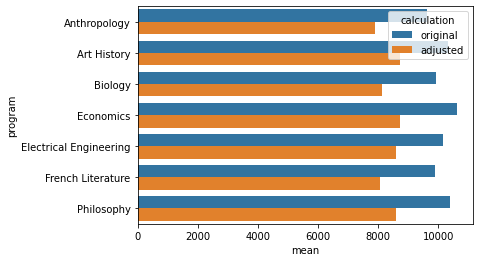

In [45]:
# ignore this ugly cod
original_summary = utilities.multiple_describe(data, 'program', 'earnings_change')
adjusted_summary = utilities.multiple_describe(data, 'program', 'trend_adjusted_change')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "adjusted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

__Calculate earnings premium - VERY fancy way__

In [51]:
premium = metrics.Earnings_Premium(data, 'state_fips', 'education_level', 'earnings_start', 'earnings_end', 'program_start', 'program_end', 'age')

/Users/mattlerner/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
data['predicted_wage'] = premium.predicted_wage
data['earnings_premium'] = premium.full_premium

In [58]:
data.sample(5)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,premium
8411,8412,Earthling,Moman,34614.000,51451.000,24,Economics,2013,2015,124,...,6,54511.914,16837.000,2013-09,2015-06,493.480,06,16343.520,40529.365,10921.635
3549,3550,Venusian,Wan,42111.000,54044.000,61,Art History,2013,2015,81,...,6,57259.176,11933.000,2013-09,2015-06,493.480,06,11439.520,37788.057,16255.943
9537,9538,Neptunian,Moman,34101.000,48921.000,67,Economics,2014,2017,125,...,7,50114.497,14820.000,2014-09,2017-07,3365.960,13,11454.040,25275.299,23645.701
3031,3032,Venusian,Wan,34843.000,43104.000,30,French Literature,2013,2015,73,...,7,45668.336,8261.000,2013-08,2015-07,1000.480,37,7260.520,40186.385,2917.615
10026,10027,Earthling,Moman,24085.000,33376.000,38,French Literature,2014,2017,125,...,7,34190.255,9291.000,2014-10,2017-07,5786.040,06,3504.960,26210.992,7165.008


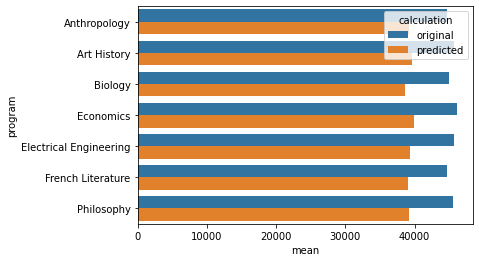

In [59]:
# Mean predicted vs actual wage by program
original_summary = utilities.multiple_describe(data, 'program', 'earnings_end')
adjusted_summary = utilities.multiple_describe(data, 'program', 'predicted_wage')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "predicted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

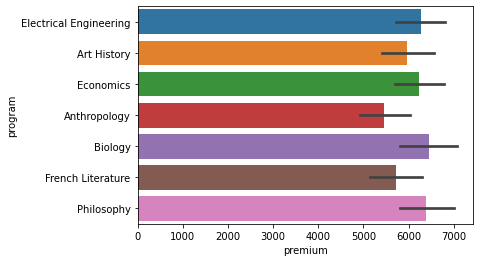

In [60]:
sns.barplot(x="premium", y="program", data=data, estimator=np.mean)

__Calculate employment premium__

In [61]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,premium
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,5,39134.876,11063.000,2014-10,2016-05,2525.120,34,8537.880,33129.647,4273.353
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,6,37913.936,9449.000,2015-09,2017-06,1596.400,25,7852.600,29168.798,7842.202
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,5,39673.618,10165.000,2013-09,2013-05,-1340.040,51,11505.040,26641.000,10165.000
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,6,41576.535,11430.000,2010-09,2011-06,572.000,36,10858.000,27542.655,9699.345
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,5,40913.638,11827.000,2011-10,2012-05,-705.120,08,12532.120,25867.413,11540.587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,5,nan,5979.000,2015-09,2019-05,4041.440,01,1937.560,37922.562,-5103.562
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,6,nan,52950.000,2015-09,2019-06,4783.480,48,48166.520,16279.492,53247.508
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,7,nan,nan,2018-08,2020-07,nan,48,nan,nan,nan
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,6,39994.000,nan,2016-09,2018-06,1187.160,51,nan,nan,nan


__Calculate time to completion and completion rate statistics__

In [62]:
completion = metrics.Completion(data, 'program', 'program_start', 'program_end', 'employed_at_end')

In [67]:
completion_time = completion.time_to_completion
completion_time

,program,n,mean,median,sd,min,max
0,Anthropology,1494,2.327,2,1.670,0,8
1,Art History,1444,2.391,2,1.669,0,9
2,Biology,1358,2.323,2,1.666,0,9
3,Economics,1451,2.378,2,1.608,0,8
4,Electrical Engineering,1495,2.282,2,1.662,0,8
5,French Literature,1387,2.373,2,1.647,0,10
6,Philosophy,1549,2.299,2,1.658,0,8


In [68]:
completion_rate = completion.completion_rates
completion_rate

,program,n,mean,median,sd,min,max
0,Anthropology,1494,0.898,1,0.303,0,1
1,Art History,1444,0.925,1,0.263,0,1
2,Biology,1358,0.908,1,0.289,0,1
3,Economics,1451,0.905,1,0.293,0,1
4,Electrical Engineering,1495,0.906,1,0.292,0,1
5,French Literature,1387,0.898,1,0.302,0,1
6,Philosophy,1549,0.912,1,0.283,0,1


Text(0.5, 1.0, 'Average time to complete')

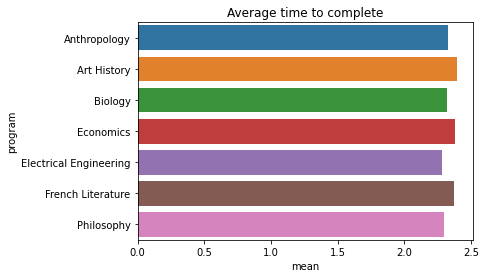

In [75]:
sns.barplot(x="mean", y="program", data=completion_time).set_title("Average time to complete")

Text(0.5, 1.0, 'Average completion rate')

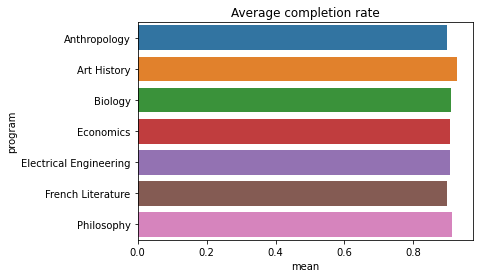

In [76]:
sns.barplot(x="mean", y="program", data=completion_rate).set_title("Average completion rate")

__Try out loan amounts__